In [1]:
import numpy as np
import pandas as pd
import sys, os, time
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../..')

In [3]:
from src.sampling_algorithms.event_time_samplers import zigzag_gaussian_bounce
from src.sampling_algorithms import ZigZag
from src.utils import interp, get_xtv
from src.plots.arrow_plot import arrow_plot

In [4]:
# init values
chain_length = d = 2
init_x = np.array([np.random.rand() for _ in range(chain_length)])
init_v = np.array([np.random.rand() for _ in range(chain_length)])
refresh_rate = 0.1

mus = np.repeat(0., chain_length)
sigs = np.repeat(1.,chain_length)




In [5]:
overall_Sig = np.diag(np.repeat(1., chain_length))

In [6]:
bounce_fn = zigzag_gaussian_bounce(mus, overall_Sig)
bounce_fns = [bounce_fn for _ in range(d)]

In [7]:
zz = ZigZag(init_x, init_v, bounce_fns, refresh_rate=0.01)

In [8]:
nsim = 10000
partition = 5
start = time.time()
nsim = 10**5
res = np.array(zz.simulate(nsim))
print(time.time()-start)



5.33554744720459


In [9]:
x1,t1,v1=get_xtv(res,0)
x2,t2,v2=get_xtv(res,1)

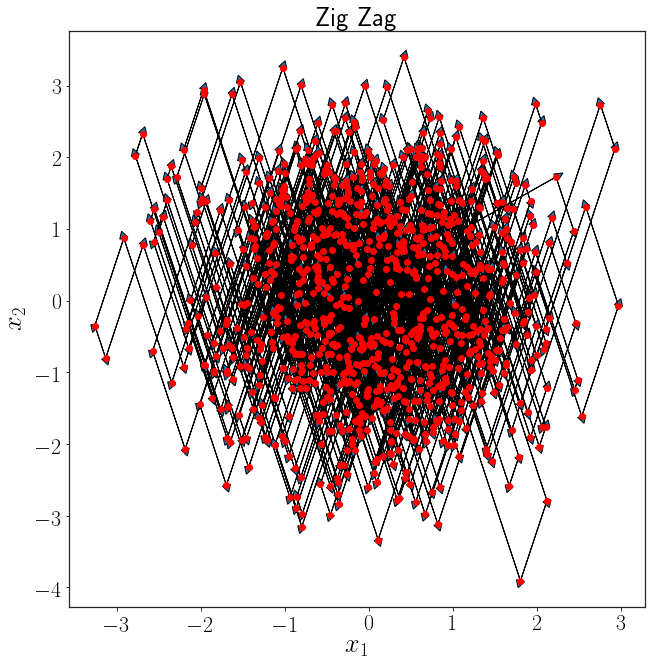

In [15]:
plot_limit = 1000
fig_size = (10,10)
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


fig = plt.figure(figsize=fig_size,frameon =True)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
ax.set_title("Zig Zag", fontsize='large', fontweight='bold')
ax.set_xlabel("$x_1$",fontsize='large', fontweight='bold')
ax.set_ylabel("$x_2$",fontsize='large', fontweight='bold')

arrow_plot(x1[:plot_limit],x2[:plot_limit])
fig.savefig('./zigzag.eps', format='eps', dpi=1200)
